### Time-Series Forecasting: Predicting Stock Prices Using Facebook’s Prophet Library

This is an introductory tutorial on time-series forecasting using Facebook's prophet library.  

**Disclaimer:** I will not be responsible for your financial loss if you blindly follow these. It is upto you to do your own research and invest carefully.

**Shift + Enter** to run a cell block

In [1]:
import numpy as np  # For all kinds of mathematical operations
import pandas as pd
import matplotlib.pyplot as plt  # For plotting

<a href="https://github.com/facebook/prophet" style="color:blue;font-size:18px;" ><strong>Facebook's prophet Library in Github </strong></a>

**Installation**

```
pip install pystan

pip install fbprophet
```

In [2]:
from fbprophet import Prophet  # library for forcasting

Go to [Yahoo Finance](https://finance.yahoo.com/). Search for the company you want to track. Go to *Historical Data* and download the required period data

![](images/yahoofinance.png)

In [5]:
data = pd.read_csv('csvs/GOOG.csv')
data.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-02,605.590027,614.340027,599.710022,614.340027,614.340027,2575600
1,2015-09-03,617.000000,619.710022,602.820984,606.250000,606.250000,1759600
2,2015-09-04,600.000000,603.469971,595.250000,600.700012,600.700012,2089000
3,2015-09-08,612.489990,616.309998,604.119995,614.659973,614.659973,2279500
4,2015-09-09,621.219971,626.520020,609.599976,612.719971,612.719971,1702100
5,2015-09-10,613.099976,624.159973,611.429993,621.349976,621.349976,1905300
6,2015-09-11,619.750000,625.780029,617.419983,625.770020,625.770020,1373500
7,2015-09-14,625.700012,625.859985,619.429993,623.239990,623.239990,1702300
8,2015-09-15,626.700012,638.700012,623.780029,635.140015,635.140015,2084400
9,2015-09-16,635.469971,637.950012,632.320007,635.979980,635.979980,1286500


Print some statistics such as the mean, median, min, max and standard
deviation values for the above features (columns). 

Search in [Investopedia](https://www.investopedia.com/terms/a/adjusted_closing_price.asp) for definitions

In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,1025.842848,1035.565993,1016.557074,1026.610471,1026.610471,1.692437e+06
std,238.718778,242.128034,236.319943,239.563688,239.563688,7.823883e+05
min,597.280029,603.469971,589.380005,594.890015,594.890015,3.475000e+05
25%,786.625000,791.810028,783.179993,787.055023,787.055023,1.213200e+06
50%,1048.000000,1058.619995,1033.689941,1046.400024,1046.400024,1.488100e+06
75%,1186.515015,1196.760010,1177.070496,1186.940002,1186.940002,1.943000e+06
max,1653.680054,1665.729980,1632.219971,1660.709961,1660.709961,6.653900e+06


In [7]:
# Select only the important features i.e. the date and price
data_pred = data[["Date","Close"]] # select Date and Price

# Rename the features: These names are NEEDED for the model fitting
data_pred = data_pred.rename(columns = {"Date":"ds","Close":"y"})

In this tutorial, we will not split the data into training and test sets but instead we will use all the data to fit the model and then ask the model to predict future values i.e. the stock price in 2021.


Usually people split the data into training and testing because they do not want to train the model on the test set as well. If we keep a test set hidden, then the model will forecast values on unseen data. In that case, we would be also able to measure the error of the model.

In [8]:
model = Prophet(daily_seasonality =True)
model.fit(data_pred)

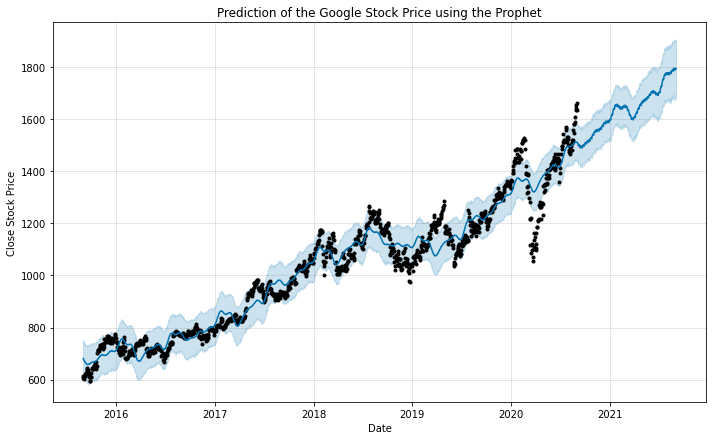

In [9]:
future = model.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = model.predict(future)
model.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

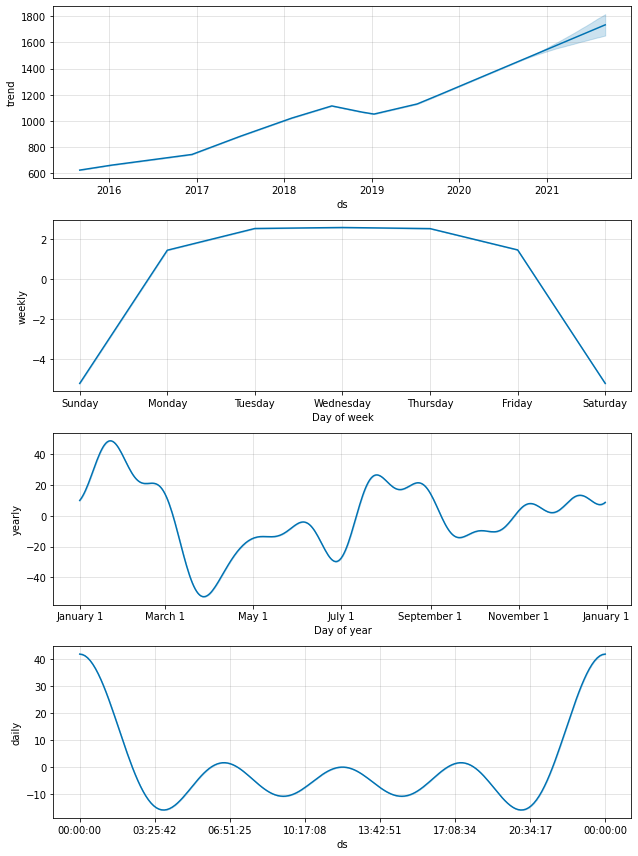

In [10]:
model.plot_components(prediction)
plt.show()

## HW: Try for APPLE

### Other resources

* [Weather Forecasting](https://github.com/ashBabu/Machine-Learning/blob/master/Weather%20Forecasting%20Time%20Series%20Forcasting%20LSTM%20(RNN).ipynb)

### References

* [Towards Data Science](https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-facebooks-prophet-model-9ee1657132b5 
)

* https://github.com/facebook/prophet